In [1]:
"""
Laura Lecinena Pastor
Michael Strick
Lisa Fenzel
"""

import numpy # matrices and multi-dimensional arrays, linear algebra
import sklearn # machine learning
import matplotlib # plotting

# 1 Exploring the Data

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.keys())

data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

import numpy as np
import matplotlib.pyplot as plt

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


What is the size of these images? - It is a 8x8 array

In [3]:
print(np.shape(images[3]))
print(np.shape(images[9]))

(8, 8)
(8, 8)


Visulize one image of a 3 using the imshow function trying the two interpolation methods in the code

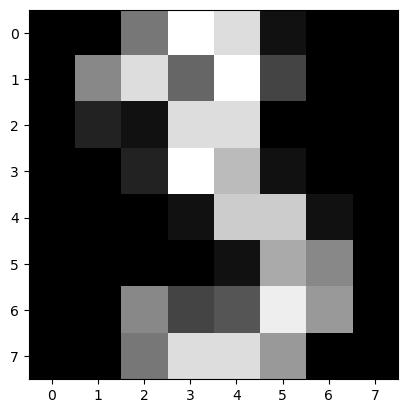

In [4]:
img = images[3]

assert 2 == len(img.shape)

plt.figure()
plt.gray()
plt.imshow(img, interpolation = "nearest")
plt.show()

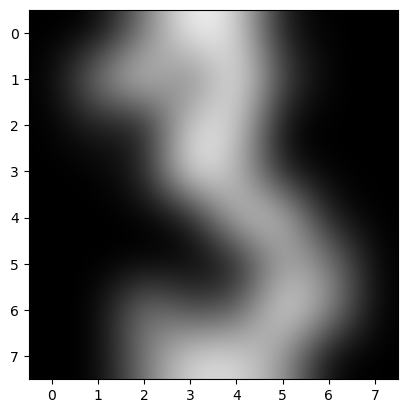

In [5]:
plt.figure()
plt.gray()
plt.imshow(img, interpolation = "bicubic")
plt.show()

<div style="color: green; font-weight: bold">Comment</div>

The solutions are the same with the given solutions.

Filter dataset and split it in training and test set (#train/#test=3/2 i.e. test set is 40% of filtered data set)

In [6]:
from sklearn import model_selection

X_all = data
y_all = target

filtered_data = []
filtered_labels = []

for image, label in zip(digits.images, digits.target):
    if label == 3 or label == 9:
       filtered_data.append(image)
       filtered_labels.append(label)

filtered_data = np.array(filtered_data)
filtered_labels = np.array(filtered_labels)
X_train , X_test , y_train , y_test = model_selection.train_test_split(filtered_data, filtered_labels,
test_size = 0.4, random_state = 0)

<div style="color: green; font-weight: bold">Comment</div>

The solutions are the same. However, I suggest rather than using label == 3 or label == 9, you could compare if label in target_list, in which target_list = [3,9]. This would be more flexible for the code if adding more targets is neccessary in the future.

# 2 Hand-crafted classifier

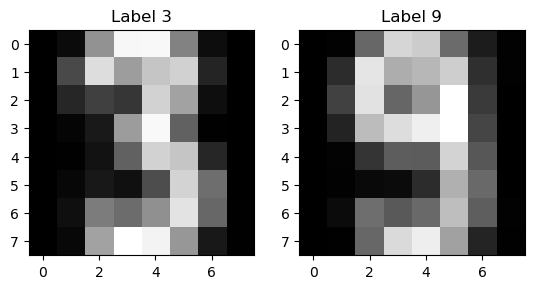

In [7]:
average_image_3 = np.mean([image for image, label in zip(filtered_data, filtered_labels) if label == 3], axis = 0)
average_image_9 = np.mean([image for image, label in zip(filtered_data, filtered_labels) if label == 9], axis = 0)

fig, ax = plt.subplots(nrows = 1, ncols = 2)
ax[0].imshow(average_image_3)
ax[0].set_title("Label 3")
ax[1].imshow(average_image_9)
ax[1].set_title("Label 9")
plt.show()

In [8]:
def features2d(x):

  f_1 = x[0][3] + x[0][4] + 1.5 * x[4][4]
  f_2 = x[2][2] + 2 * x[3][2] + x[3][3] + 2 * x[3][5] + 0.5 * x[2][5]

  return f_1, f_2

print(f"Mean for 3 in average image: {features2d(average_image_3)}\nMean for 9 in average image: {features2d(average_image_9)}")

Mean for 3 in average image: (46.4672131147541, 31.437158469945352)
Mean for 9 in average image: (30.730555555555554, 80.7)


<div style="color: green; font-weight: bold">Comment</div>

Your solution also classifies the number 3 and 9 based on certain pixels and assign weights to them which is nice. So could you explain why you chose those pixels and weights?

Mean for 3 in training set: (46.12162162162162, 30.77927927927928)
Mean for 9 in training set: (31.660377358490567, 79.38679245283019)


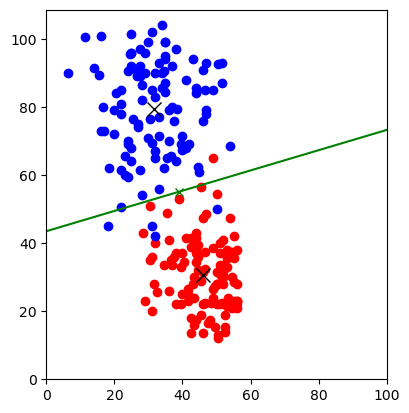

In [9]:
from statistics import mean

f_3x, f_3y, f_9x, f_9y = [], [], [], []
training_features = []

for item, label in zip(X_train, y_train):
  feature = features2d(item)
  training_features.append(feature)

  if label == 3:
    f_3x.append(feature[0])
    f_3y.append(feature[1])

  if label == 9 :
    f_9x.append(feature[0])
    f_9y.append(feature[1])

mean_3 = (mean(f_3x), mean(f_3y))
mean_9 = (mean(f_9x), mean(f_9y))

print(f"Mean for 3 in training set: {mean_3}\nMean for 9 in training set: {mean_9}")

# Berechnung des Vektors zwischen den Means (von mean 3 zu mean 9)
vector = (mean_9[0] - mean_3[0], mean_9[1] - mean_3[1])

# Drehung des Vektors um 90 Grad
perpendicular = (-vector[1], vector[0])

# Berechnung des Punktes auf der Mitte des Vektors

bisector_point = (mean_3[0] + 0.5 * vector[0], mean_3[1] + 0.5 * vector[1])

x_range = np.linspace(0, 100, 100)
y_range = bisector_point[1] + (x_range - bisector_point[0]) * perpendicular[1] / perpendicular[0]
plt.plot(x_range, y_range, color = 'green')
plt.scatter(f_3x, f_3y, color = 'red')
plt.scatter(f_9x, f_9y, color = 'blue')
plt.plot(mean_3[0], mean_3[1], color = 'black', marker = 'x', markersize = 10)
plt.plot(bisector_point[0], bisector_point[1], color = 'green', marker = 'x')
plt.plot(mean_9[0], mean_9[1], color = 'black', marker = 'x', markersize = 10)
plt.axis("scaled")
plt.xlim(xmin = 0, xmax = 100)
plt.ylim(ymin = 0)
plt.show()

<div style="color: green; font-weight: bold">Comment</div>

The solutions are the same with the given solutions. However, I think the testing set should be plotted as well.

In [10]:
import math

predicted_features = []

# Definition der Schwellenwertfunktion
def decision_boundary(x):
  if math.sqrt((mean_3[0] - x[0])**2 + (mean_3[1] - x[1])**2) > math.sqrt((mean_9[0] - x[0])**2 + (mean_9[1] - x[1])**2):
    return 9
  else:
    return 3

def nearest_mean(training_features, training_labels, test_features):

  N, FP, FN = len(training_features), 0, 0
  predicted_labels = []

  # Fehler bei Trainingset
  for item, label in zip(training_features, training_labels):
    prediction = decision_boundary(features2d(item))

    if prediction == 3 and label == 9:    # \hat{y}=3 und y^*=9 d.f. false negative
      FN += 1
    if prediction == 9 and label == 3:    # \hat{y}=9 und y^*=3 d.f. false positive
      FP += 1

  error_ratio = (FP + FN) / N

  print(f"Number of cases: {N}\nfalse negatives: {FN}\nfalse positives: {FP}\nerror ratio: {round(error_ratio, 5)}")

  # Prediction labels of testset
  for item in test_features:
    feature = features2d(item)
    predicted_features.append(feature)
    prediction = decision_boundary(feature)
    if prediction == 3:
      predicted_labels.append(3)
    if prediction == 9:
      predicted_labels.append(9)

  return predicted_labels

predicted_labels = nearest_mean(X_train, y_train, X_test)

Number of cases: 217
false negatives: 4
false positives: 1
error ratio: 0.02304


<div style="color: green; font-weight: bold">Comment</div>

The error rate is better than the given solution which is good. But I think the code should be implemented as the given code so that it would be suitable for more than 2 target classes.

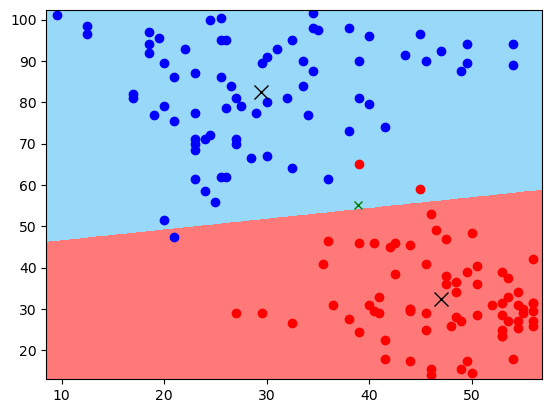

In [12]:
import sys
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap

min1, max1, min2, max2 = sys.maxsize, 0, sys.maxsize, 0

f_3x, f_3y, f_9x, f_9y = [], [], [], []


for item, label in zip(X_test, y_test):
  feature = features2d(item)


  if label == 3:
    f_3x.append(feature[0])
    f_3y.append(feature[1])

  if label == 9 :
    f_9x.append(feature[0])
    f_9y.append(feature[1])

mean_3 = (mean(f_3x), mean(f_3y))
mean_9 = (mean(f_9x), mean(f_9y))

for feature in predicted_features:
    x, y = feature

    if x < min1:
        min1 = x
    if x > max1:
        max1 = x

    if y < min2:
        min2 = y
    if y > max2:
        max2 = y

x1grid = np.arange(min1 - 1, max1 + 1, 0.1)
x2grid = np.arange(min2 - 1, max2 + 1, 0.1)
xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
model = LogisticRegression()
model.fit(predicted_features, predicted_labels)
yhat = model.predict(grid)
yhat = model.predict(grid)
zz = yhat.reshape(xx.shape)
colors = ['#ff7979', '#98d8f8']
cmap = ListedColormap(colors)
plt.contourf(xx, yy, zz, cmap=cmap)

plt.scatter(f_3x, f_3y, color = 'red')
plt.scatter(f_9x, f_9y, color = 'blue')
plt.plot(mean_3[0], mean_3[1], color = 'black', marker = 'x', markersize = 10)
plt.plot(bisector_point[0], bisector_point[1], color = 'green', marker = 'x')
plt.plot(mean_9[0], mean_9[1], color = 'black', marker = 'x', markersize = 10)
plt.show()

<div style="color: green; font-weight: bold">Comment</div>

I believe we do not need 4 arrays to store coordinates of features for 3 and 9 because we can create a 2-d array to store values of features2d(X_test) and work on that.

# 3 LDA

In [13]:
import math
def fit_lda(training_features, training_labels):

    mu_3, mu_9, mu_3_count, mu_9_count = 0, 0, 0, 0

    for item, label in zip(training_features, training_labels):
        if label == 3:
            mu_3 += item
            mu_3_count +=1

        if label == 9 :
            mu_9 += item
            mu_9_count +=1

    mu = [1 / mu_3_count* mu_3, 1 / mu_9_count* mu_9]
    mu_3_1 = [1 / mu_3_count* mu_3]


    N=len(training_features)
    D=len(np.array(training_features).T)

    # covariance matrix
    covmat=np.zeros((D,D))

    for item, label in zip(training_features, training_labels):
        if label == 3:
            s=np.array(item-mu[0])
            covmat+= np.outer(s,s)
        if label == 9:
            t=np.array(item-mu[1])
            covmat+= np.outer(t,t)

    covmat= (1/N)*covmat

    # propabilities
    p=[mu_3_count/N, mu_9_count/N ]

    #cov_matrix = np.cov(mu, rowvar=False)
    #print(cov_matrix)
    #return mu, covmat, p
    return mu, covmat, p


mu, covmat,p = fit_lda(np.array(training_features),y_train)




def predict_lda(mu, covmat, p, test_features):
    beta=np.dot(np.linalg.inv(covmat),np.array(mu[1]-mu[0]))
    b=-0.5*np.dot(mu[1]+mu[0],beta)+ math.log(p[1]/p[0])

    # total number of test instances
    M=len(test_features)
    # total number of test features
    D=len(np.array(test_features).T)

    prediction =[]

    for item in test_features:
        if np.dot(np.array(item).T,beta) >(-1)*b:
            prediction.append(9)
        else:
            prediction.append(3)
    return prediction



predicted_labels_training = predict_lda(mu, covmat,p,training_features)
N, FP, FN, k = len(np.array(X_train)), 0, 0, 0

for item, label in zip(training_features, y_train):
    prediction = predicted_labels_training[k]
    if prediction == 3 and label == 9:    # \hat{y}=3 und y^*=9 d.f. false negative
      FN += 1
    if prediction == 9 and label == 3:    # \hat{y}=9 und y^*=3 d.f. false positive
      FP += 1
    k +=1

error_ratio_train = (FP + FN) / N
print(error_ratio_train)


#error rate test data
N, FP, FN, k = len(predicted_features), 0, 0, 0
predicted_labels_test = predict_lda(mu, covmat, p, np.array(predicted_features))
for item, label in zip(np.array(predicted_features), y_test):
    prediction = predicted_labels_test[k]
    if prediction == 3 and label == 9:    # \hat{y}=3 und y^*=9 d.f. false negative
      FN += 1
    if prediction == 9 and label == 3:    # \hat{y}=9 und y^*=3 d.f. false positive
      FP += 1
    k +=1

error_ratio_test = (FP + FN) / N
print(error_ratio_test)



0.02304147465437788
0.0136986301369863


cluster means:
$$
\begin{aligned}
\mu_{3}&= \frac{1}{N_{3}}\sum_{i:~~y_i^*=3}x_i
\end{aligned}
$$
and
$$
\begin{aligned}
\mu_{9}&= \frac{1}{N_{9}}\sum_{i:~~y_i^*=9}x_i
\end{aligned}
$$

[9, 9, 9, 3, 9, 9, 3, 3, 9, 9, 3, 9, 3, 3, 9, 9, 3, 3, 3, 3, 3, 9, 9, 9, 3, 3, 9, 9, 9, 3, 9, 9, 3, 9, 9, 3, 3, 3, 3, 9, 9, 3, 9, 9, 9, 9, 9, 9, 9, 9, 3, 9, 9, 9, 9, 3, 3, 9, 9, 3, 9, 3, 3, 9, 3, 3, 9, 3, 3, 9, 3, 9, 3, 3, 9, 3, 9, 9, 3, 9, 3, 3, 9, 3, 3, 9, 3, 3, 9, 9, 3, 9, 3, 9, 9, 9, 9, 3, 3, 3, 3, 3, 3, 3, 3, 9, 3, 3, 3, 9, 9, 9, 9, 9, 3, 9, 9, 9, 3, 9, 3, 9, 9, 3, 3, 9, 3, 3, 9, 9, 3, 9, 3, 9, 3, 3, 9, 9, 9, 9, 3, 3, 9, 9, 3, 9, 3, 3, 9, 3, 3, 3, 9, 3, 9, 9, 9, 9, 9, 3, 3, 9, 3, 9, 3, 3, 3, 9, 9, 3, 9, 9, 3, 3, 3, 9, 9, 9, 9, 9, 9, 3, 3, 3, 3, 3, 3, 9, 3, 3, 9, 3, 3, 9, 3, 3, 3, 3, 3, 3, 3, 9, 3, 9, 3, 9, 9, 3, 9, 3, 3, 3, 3, 3, 3, 3, 3]


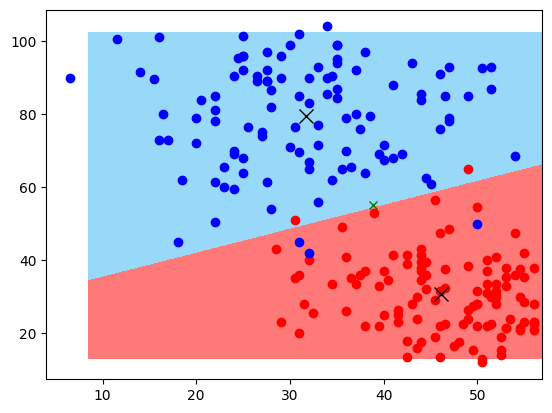

In [ ]:
import sys
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap


print(predicted_labels_training)


min1, max1, min2, max2 = sys.maxsize, 0, sys.maxsize, 0

f_3x, f_3y, f_9x, f_9y = [], [], [], []
training_features = []

for item, label in zip(X_train, y_train):
  feature = features2d(item)
  training_features.append(feature)

  if label == 3:
    f_3x.append(feature[0])
    f_3y.append(feature[1])

  if label == 9 :
    f_9x.append(feature[0])
    f_9y.append(feature[1])

mean_3 = (mean(f_3x), mean(f_3y))
mean_9 = (mean(f_9x), mean(f_9y))

for feature in predicted_features:
    x, y = feature

    if x < min1:
        min1 = x
    if x > max1:
        max1 = x

    if y < min2:
        min2 = y
    if y > max2:
        max2 = y

x1grid = np.arange(min1 - 1, max1 + 1, 0.1)
x2grid = np.arange(min2 - 1, max2 + 1, 0.1)
xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
model = LogisticRegression()
model.fit(training_features, predicted_labels_training)
yhat = model.predict(grid)
yhat = model.predict(grid)
zz = yhat.reshape(xx.shape)
colors = ['#ff7979', '#98d8f8']
cmap = ListedColormap(colors)
plt.contourf(xx, yy, zz, cmap=cmap)

plt.scatter(f_3x, f_3y, color = 'red')
plt.scatter(f_9x, f_9y, color = 'blue')
plt.plot(mean_3[0], mean_3[1], color = 'black', marker = 'x', markersize = 10)
plt.plot(bisector_point[0], bisector_point[1], color = 'green', marker = 'x')
plt.plot(mean_9[0], mean_9[1], color = 'black', marker = 'x', markersize = 10)
plt.show()

<div style="color: green; font-weight: bold">Comment</div>

- Implement LDA Training:
- Implement LDA Prediction: It's basically like the sample solution, even though you could use np.sign to get the predicted labels faster (And maybe delete the unused variables D and M)
-

# 4 SVM

Error rate our svm: 0.00684931506849315
Error rate sklearn svm: 0.013698630136986356


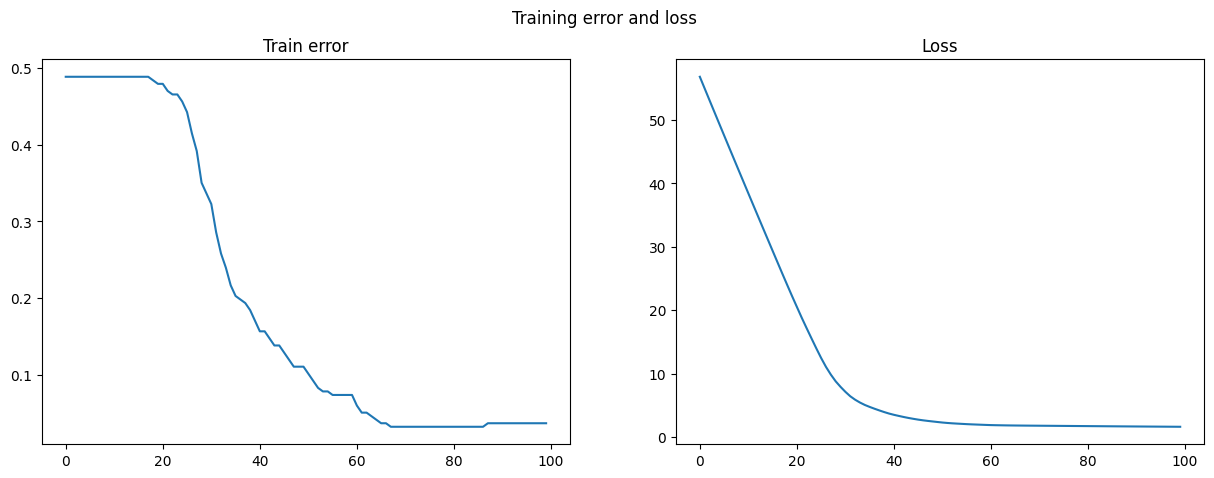

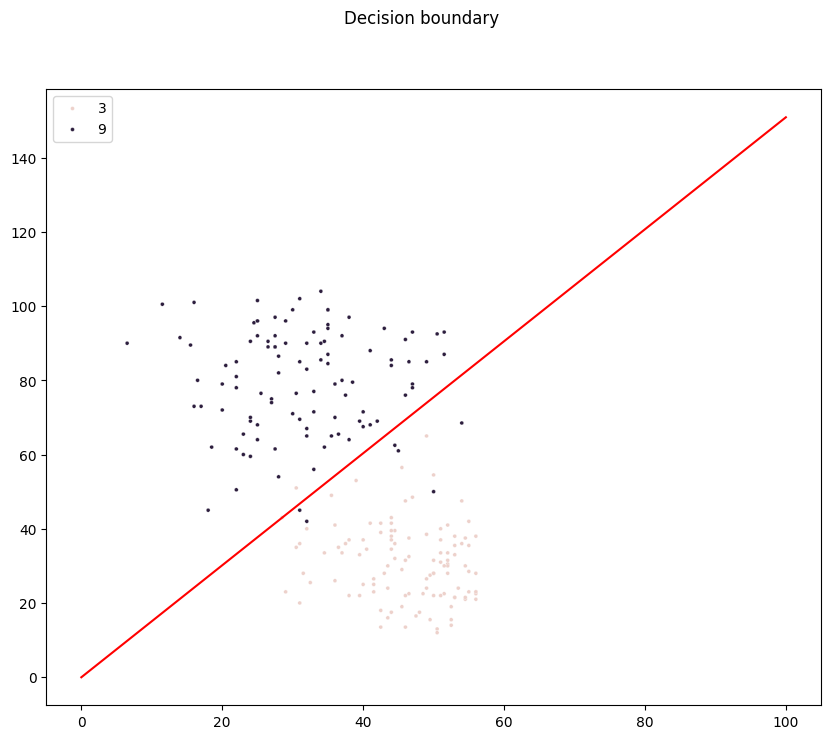

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import seaborn as sns
from sklearn.metrics import accuracy_score


def beta_derivative(train_feat,train_label,N,lam,beta,b):
    # training data tuples
    train_data = zip(train_feat,train_label)
    label_feature_sum = 0
    for feature,label in train_data:
        feat_ary = np.array(feature)
        if label*(feat_ary.dot(beta)+b) < 1:
            label_feature_sum += (-label*feat_ary.T)
    return beta+lam/N*label_feature_sum

def b_derivative(train_feat,train_label,N,lam,beta,b):
    # training data tuples
    train_data = zip(train_feat,train_label)
    label_sum = 0
    for feature,label in train_data:
        feat_ary = np.array(feature)
        if label*(feat_ary.dot(beta)+b) < 1:
            label_sum += (-label)
    return lam/N*label_sum

def gradient_descent(train_feat,train_label,N,lam,beta,b,tau):
    # Get new beta and b using gradient-descent
    new_beta = beta - tau*beta_derivative(train_feat,train_label,N,lam,beta,b)
    new_b = b - tau*b_derivative(train_feat,train_label,N,lam,beta,b)
    return new_beta, new_b

def fit_svm(train_feat, train_label, lam):
    # training data tuples
    train_data = zip(train_feat,train_label)

    # initialize beta with gaussian normal
    beta = np.random.normal(0,1,len(train_feat[0]))
    b = 0
    relu_sum = 0
    #lam = 1 #1
    loss = []
    steps = 100 # 1000
    tau = 0.001  #0.001
    i = 0
    N = len(train_feat)
    wrong_predictions = 0
    train_error = []
    for x in range(steps):
        train_data = zip(train_feat,train_label)
        #if x == 50 or x == 75:
        #    tau /= 10
        for feature,label in train_data:
            feat_ary = np.array(feature)
            if 1-(label*(feat_ary.dot(beta)+b)) >= 0:
            #if (label*(feat_ary.dot(beta)+b)) <= 1:
                #print("wrong:",label,feat_ary.dot(beta)+b)
                relu_sum+=1-(label*(feat_ary.dot(beta)+b))
                wrong_predictions += 1
        loss.append(0.5*beta.T.dot(beta)+lam/N*relu_sum)
        train_error.append(wrong_predictions/N)
        if len(train_error)>50:
            #print(abs(train_error[-1]-np.mean(train_error[11:-1])))
            if abs(train_error[-1]-np.mean(train_error[11:-1]))<0.1:
                tau /= 10
        beta, b = gradient_descent(train_feat,train_label,N,lam,beta,b,tau)
        wrong_predictions = 0
        relu_sum = 0
    return beta, b, loss, train_error


def predict_svm(beta, b, test_features):
    prediction =[]
    for item in test_features:
        if np.sign(item.dot(beta)+b) > 0:
            prediction.append(9)
        else:
            prediction.append(3)
    return prediction

def sklearn_svm(training_features,training_labels):
    feat_ary = np.array(training_features)
    classifier = svm.SVC(kernel='linear').fit(feat_ary,training_labels)
    return classifier


training_labels = [-1 if item == 3 else 1 for item in y_train]
training_features =[]


for item, label in zip(X_train, y_train):
  feature = features2d(item)
  training_features.append(feature)

# Optimize beta and b
beta, b, loss, train_error = fit_svm(training_features,training_labels,1)


test_labels = [-1 if item == 3 else 1 for item in y_train]
test_features =[]

# Test data prediction
for item, label in zip(X_test, y_test):
  feature = features2d(item)
  test_features.append(feature)

test_prediction = predict_svm(beta, b, np.array(test_features))

#error rate test data
N, FP, FN, k = len(test_features), 0, 0, 0
for prediction, label in zip(test_prediction, y_test):
    #print(prediction)
    if prediction == 3 and label == 9:    # \hat{y}=3 und y^*=9 d.f. false negative
      FN += 1
    if prediction == 9 and label == 3:    # \hat{y}=9 und y^*=3 d.f. false positive
      FP += 1
error_ratio_test = (FP + FN) / N
print("Error rate our svm:", error_ratio_test)


classifier = sklearn_svm(training_features,training_labels)
y_pred = classifier.predict(np.array(test_features))
test_labels = [-1 if item == 3 else 1 for item in y_test]
accuracy = accuracy_score(test_labels,y_pred)
svm_error = 1-accuracy
print("Error rate sklearn svm:",svm_error)


# Loss and train error
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Training error and loss')
axs[0].plot(train_error)
axs[0].set_title('Train error')
axs[1].plot(loss)
axs[1].set_title('Loss')
plt.show()

# Decision boundary
plt.figure(figsize=(10, 8))
plt.suptitle('Decision boundary')
sns.scatterplot(x=np.array(training_features)[:, 0],
                y=np.array(training_features)[:, 1],
                hue=y_train,
                s=8)


x_points = np.linspace(0, 100)
y_points = -(beta[0] / beta[1]) * x_points - b / beta[1]
plt.plot(x_points, y_points, c='r')

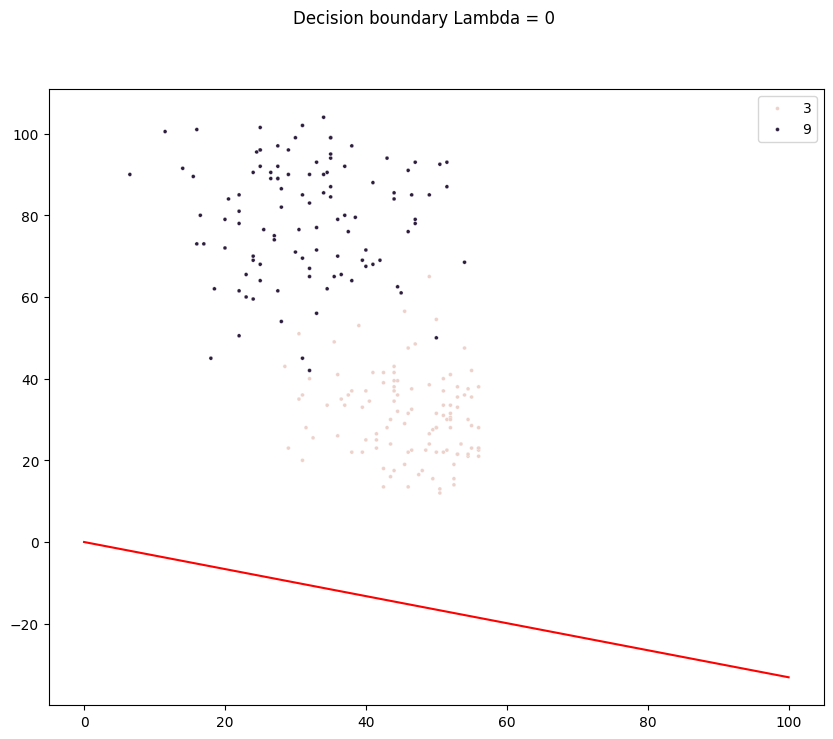

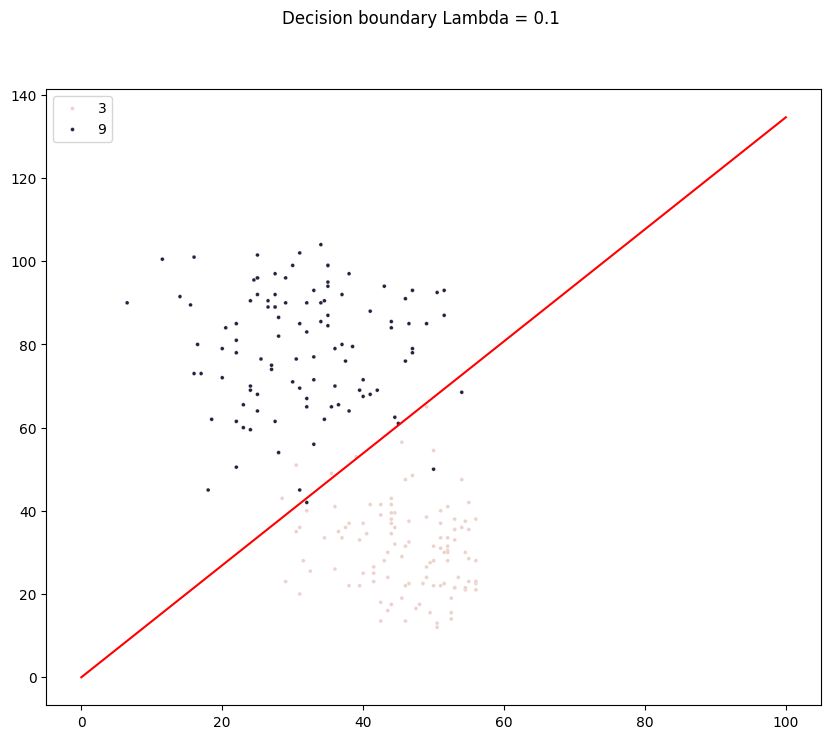

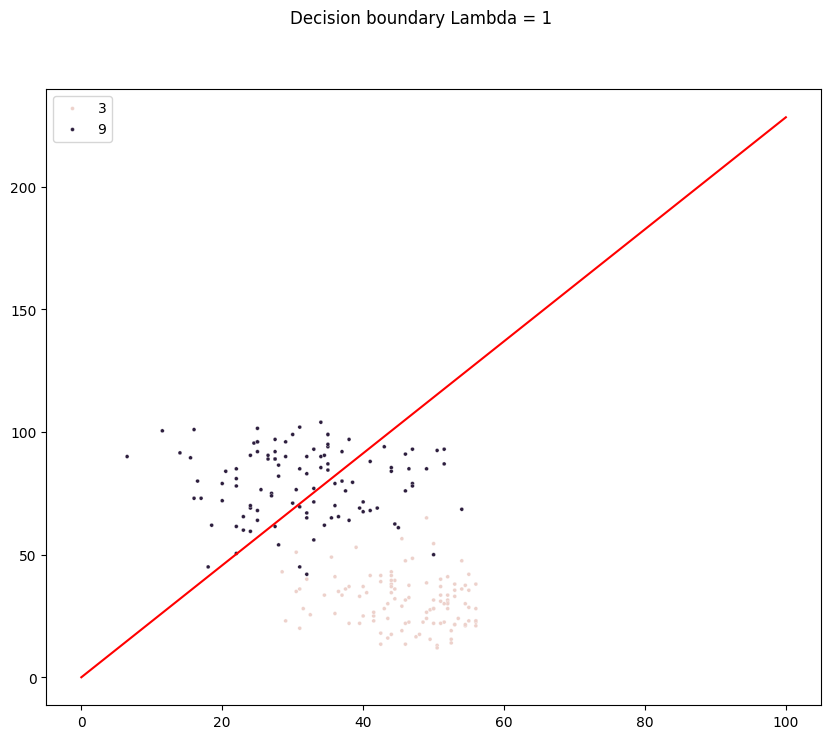

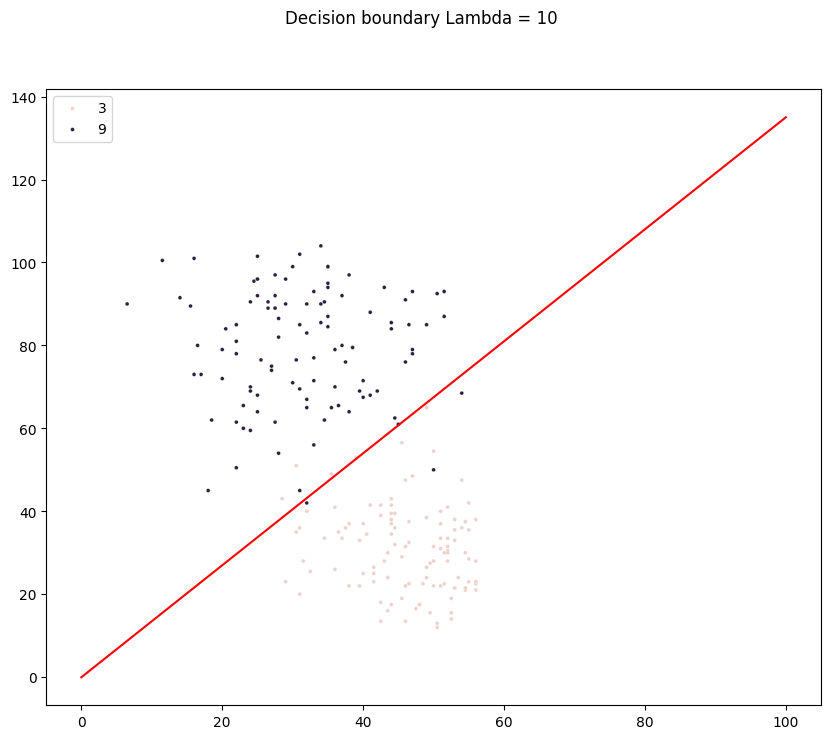

In [ ]:
beta, b, loss, train_error = fit_svm(training_features,training_labels,0)

# Decision boundary
plt.figure(figsize=(10, 8))
plt.suptitle('Decision boundary Lambda = 0')
sns.scatterplot(x=np.array(training_features)[:, 0],
                y=np.array(training_features)[:, 1],
                hue=y_train,
                s=8)


x_points = np.linspace(0, 100)
y_points = -(beta[0] / beta[1]) * x_points - b / beta[1]
plt.plot(x_points, y_points, c='r')


beta, b, loss, train_error = fit_svm(training_features,training_labels,0.1)

# Decision boundary
plt.figure(figsize=(10, 8))
plt.suptitle('Decision boundary Lambda = 0.1')
sns.scatterplot(x=np.array(training_features)[:, 0],
                y=np.array(training_features)[:, 1],
                hue=y_train,
                s=8)


x_points = np.linspace(0, 100)
y_points = -(beta[0] / beta[1]) * x_points - b / beta[1]
plt.plot(x_points, y_points, c='r')

beta, b, loss, train_error = fit_svm(training_features,training_labels,1)

# Decision boundary
plt.figure(figsize=(10, 8))
plt.suptitle('Decision boundary Lambda = 1')
sns.scatterplot(x=np.array(training_features)[:, 0],
                y=np.array(training_features)[:, 1],
                hue=y_train,
                s=8)


x_points = np.linspace(0, 100)
y_points = -(beta[0] / beta[1]) * x_points - b / beta[1]
plt.plot(x_points, y_points, c='r')


beta, b, loss, train_error = fit_svm(training_features,training_labels,10)

# Decision boundary
plt.figure(figsize=(10, 8))
plt.suptitle('Decision boundary Lambda = 10')
sns.scatterplot(x=np.array(training_features)[:, 0],
                y=np.array(training_features)[:, 1],
                hue=y_train,
                s=8)


x_points = np.linspace(0, 100)
y_points = -(beta[0] / beta[1]) * x_points - b / beta[1]
plt.plot(x_points, y_points, c='r')
